# Binomial Distribution in R

Date: 2020-11-01

In [1]:
# impot packages
library(ggplot2)

## Scenario

A company specialises in chartering flights from Narnia.
The company is concerned about the rise in sky mermaids that have been spotted by the crew of the flights, as a collision could be disasterous.
The flight crew estimates that there is a 17% chance of spotting a sky mermaid during a flight.
In 20XX, the company is scheduled to fly 18 flights from Narnia.
It maybe assumed that the event of spotting a sky mermaid is independent of any other event.

-----

## Questions

**(a)** What is the model that describes the number of sky mermaids spotted out of the 18 flights?

**(b)** Construct a table showing the p.m.f. and c.d.f. of the distribution.

**(c)** Plot the probability distribution.

**(d)** Calculate the mean and variance of the distribution.

**(e)** What is the probability that five flights will spot sky mermaids in 20XX?

**(f)** What is the probability four or fewer flights will spot sky mermaids in 20XX?

**(g)** What is the probability that more than four flights will spot sky mermaids in 20XX?

-----

### (a)

Let $X$ be a random variable that represents the number of times a sky mermaid is spotted during the flights from Narnia over the year.
Then $X$ is modelled by a binomial distribution, with parameters $n$ being the number of flights flown, and $p=0.17$. In 20XX, $X \sim B(18,0.17)$.

There is no need to declare the distribution is **R**, unlike **Python**.

### (b)

We'll disply the p.d.f. and c.d.f. using a **data.frame**.

In [2]:
# declare a list
x <- c(0:18)

In [3]:
# add list to a data.frame
df_mermaids <- data.frame(x)

In [4]:
# append p(x)
df_mermaids$'p(x)' <- dbinom(x=x, size = 18, prob = 0.17)

In [5]:
# append F(x)
df_mermaids$'F(x)' <- pbinom(q=x, size = 18, prob = 0.17)

In [6]:
# view the data.fame
df_mermaids

x,p(x),F(x)
<int>,<dbl>,<dbl>
0,3.494666e-02,0.03494666
1,1.288395e-01,0.16378615
2,2.243049e-01,0.38809104
3,2.450238e-01,0.63311487
4,1.881960e-01,0.82131087
5,1.079293e-01,0.92924015
6,4.789633e-02,0.97713647
7,1.681730e-02,0.99395377
8,4.736197e-03,0.99868997


### (c)

As we have used brackets in column titles of **data.frame**, we surround the argument with backticks.

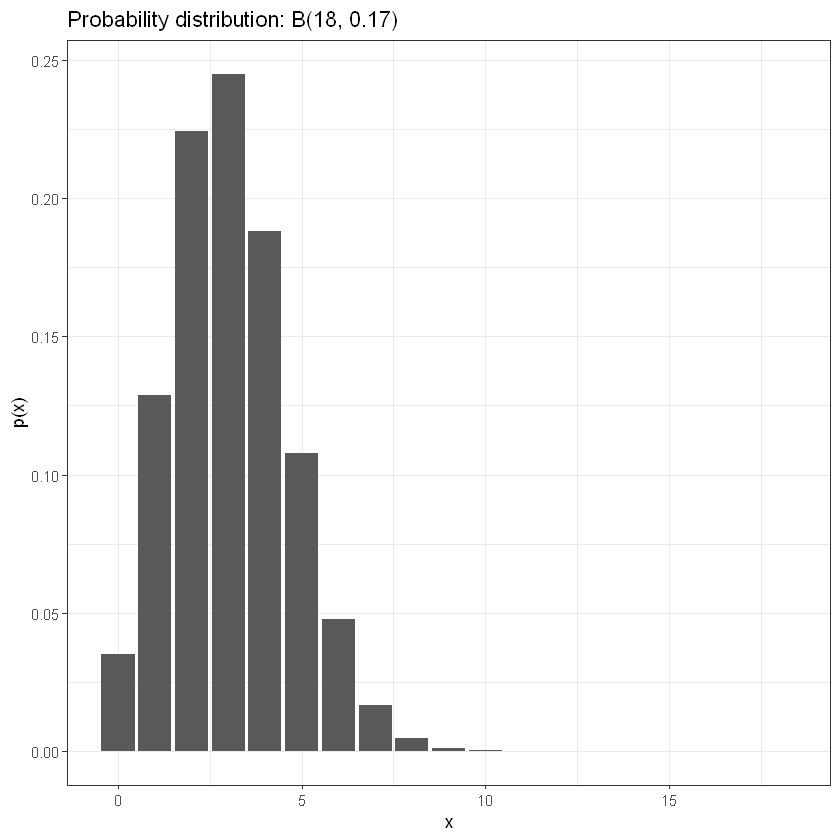

In [7]:
ggplot(data=df_mermaids) +
  geom_col(mapping = aes(x = x, y = `p(x)`)) +
  theme_bw() +
  labs(
      title = "Probability distribution: B(18, 0.17)",
      y = "p(x)"
  )

### (d)

I have not found a satisfactory means to calculate $\mu$ and $\sigma^{2}$, save for defining the formula.
I did not find this particularly interesting, so the two summary statistics are left out.

### (e)

The probability that five flights will spot sky mermaids in 20XX is

$$
P(X=5) = p(5) = \binom{18}{5} (0.17)^{5} (0.83)^{13} = \ldots
$$

In [8]:
dbinom(x = 5, size = 18, prob = 0.17)

[1] 0.1079293

### (f)

The probability four or fewer flights will spot sky mermaids in 20XX is

$$
P(X \leq 4) = F(4) = \sum_{k = 0}^{4} \binom{18}{k} (0.17)^{k} (0.83)^{18 - k} = \ldots
$$

In [9]:
pbinom(q = 4, size = 18, prob = 0.17)

[1] 0.8213109

### (g)

The probability that more than four flights will spot sky mermaids in 20XX is

$$
P(X > 4) = 1 - F(4) = \sum_{k = 5}^{18} \binom{18}{k} (0.17)^{k} (0.83)^{18 - k} = \ldots
$$

In [10]:
pbinom(q = 4, size = 18, prob = 0.17, lower.tail = FALSE)

[1] 0.1786891